<a href="https://colab.research.google.com/github/GSP31/GSP31/blob/main/REG-multiple_regre%2BDcision_tre%2B_Ran_for%2BSVR_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
    from sklearn import datasets
    from sklearn import metrics
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.svm import SVR
    import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

    import warnings
warnings.filterwarnings("ignore")

    plt.style.use('ggplot')

In [ ]:
boston = datasets.load_boston()


Convert to dataframe

In [ ]:
import pandas as pd

df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df["target"] = boston.target

In [ ]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
#Assigne to X and y

X = df.drop('target', axis=1)
y = df['target']

In [ ]:
#X = df.iloc[:, 0:13].values
#y = df.iloc[:, 13].values

## Scale

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
#y = sc.fit_transform(y)

# Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape); print(X_test.shape)

(404, 13)
(102, 13)


# **Multiple Regression**

In [ ]:
lm = LinearRegression()

lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
y_pred2= lm.predict(X_train)

dfn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfn.head()

Actual  Predicted
371    50.0  24.998822
291    37.3  34.994240
181    36.2  27.956020
135    18.1  17.246730
130    19.2  19.925569

Text(0.5, 1.0, 'target vs Predicted target: $y_i$ vs $\\hat{y}_i$')

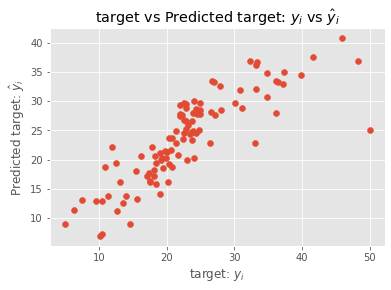

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("target: $y_i$")
plt.ylabel("Predicted target: $\hat{y}_i$")
plt.title("target vs Predicted target: $y_i$ vs $\hat{y}_i$")

## **Almost all points lie on 45 degree i.e. actual and prediction are almost equivalent**

In [ ]:
rmse = mean_squared_error(y_test, y_pred,squared=False)
print('MSE using linear regression is::',rmse)

rsq  = r2_score(y_test, y_pred)
rsq2  = r2_score(y_train, y_pred2)
print('R-Squared using linear regression is in test set::',rsq)
print('R-Squared using linear regression is in train set::',rsq2)

MSE using linear regression is:: 4.706246732455252
R-Squared using linear regression is in test set:: 0.7031948720950815
R-Squared using linear regression is in train set:: 0.7468760845590612


## **Test accuracy is higher than train and no significant difference is there so no overfitting is there**

## **Decision Tree**

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

## Predict test data

In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
y_pred2 = tree.predict(X_train)

In [ ]:
r2_score =tree.score(X_test,y_test)
print("R-squared::{}".format(r2_score))
print("RMSE: %.2f"
      % metrics.mean_squared_error(y_test, y_pred,squared=False))

R-squared::0.7439762815233684
RMSE: 4.37


In [ ]:
r2_score =tree.score(X_train,y_train)
print("R-squared::{}".format(r2_score))
print("RMSE: %.2f"
      % metrics.mean_squared_error(y_train, y_pred2,squared=False))

R-squared::1.0
RMSE: 0.00


## **Too much difference in the r2 for train and test indicating overfit**

In [ ]:
#We can visualize a part of the decision tree (here, the first 5 levels) with the following code :

#visualizing decision tree
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(tree, out_file=dot_data,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.957763 to fit



## Optimizing the tree

In [ ]:
# Create Decision Tree
clf =  DecisionTreeRegressor(max_depth=5)

# Train Decision Tree
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Predict train data
y_pred2 = clf.predict(X_train)

In [ ]:
r2_score =clf.score(X_train,y_train)
print("R-square after optimizing the tree for train is::{}".format(r2_score))
print("RMSE: %.2f"
      % metrics.mean_squared_error(y_train, y_pred2,squared=False))

R-square after optimizing the tree for train is::0.934689393480724
RMSE: 2.38


In [ ]:
r2_score =clf.score(X_test,y_test)
print("R-square after optimizing the tree for test is::{}".format(r2_score))
print("RMSE: %.2f"
      % metrics.mean_squared_error(y_test, y_pred,squared=False))

R-square after optimizing the tree for test is::0.8253768966746455
RMSE: 3.61


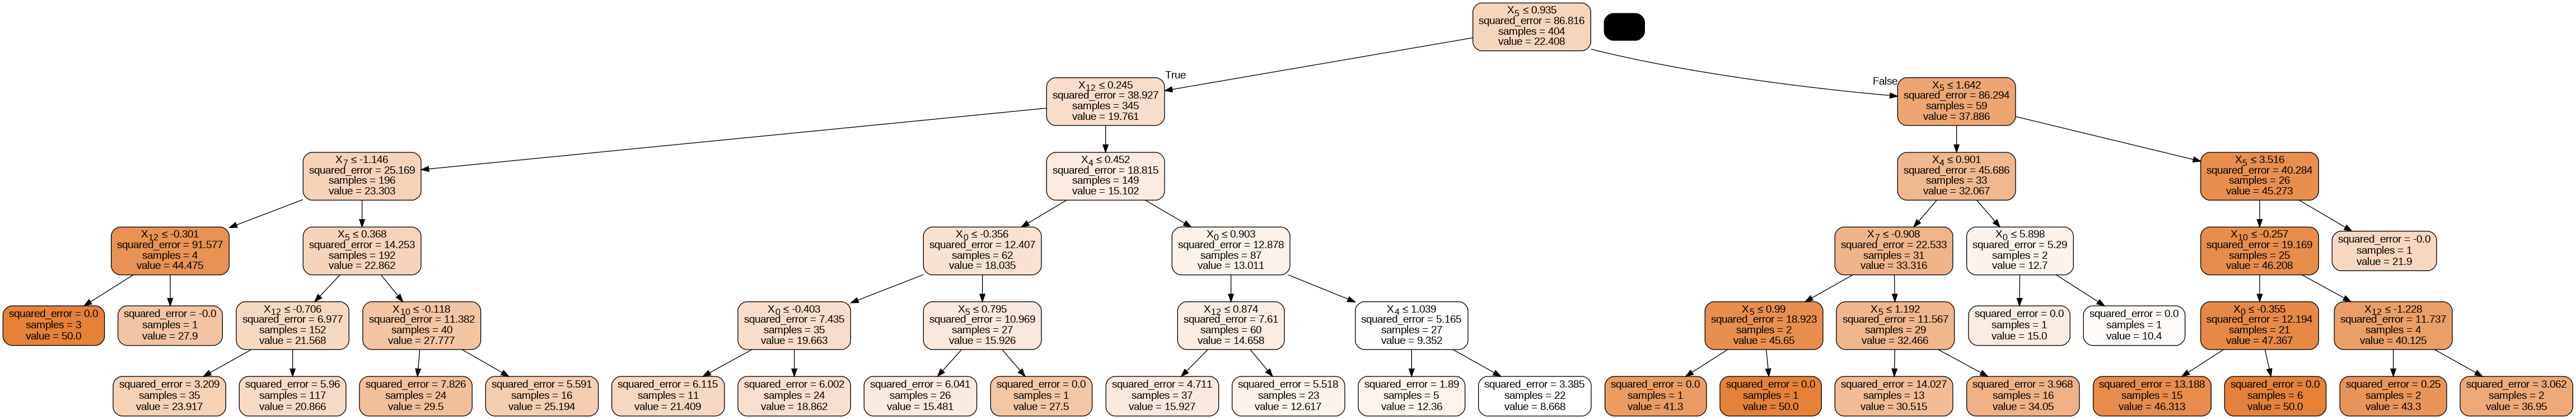

In [ ]:
#visualizing decision tree

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, max_depth=5,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Random Forest

In [ ]:
 #Training the Algorithm
 #number of tress 20
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred2 = regressor.predict(X_train)


## Evaluation

In [ ]:
#Evaluating the Algorithm on train and test data
from sklearn import metrics
from sklearn.metrics import r2_score

print('RMSE on test set:', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('R-squared test ::', r2_score(y_test, y_pred))
print('R-squared train::', r2_score(y_train, y_pred2))


RMSE on test set: 2.882253169541728
R-squared test :: 0.8886766500109294
R-squared train:: 0.9772065305790796


## Increase number of estimators

In [ ]:
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred2 = regressor.predict(X_train)

In [ ]:
print('RMSE on test set:', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('R-squared after increasing estimators in test ::', r2_score(y_test, y_pred))
print('R-squared after increasing estimators in train::', r2_score(y_train, y_pred2))

RMSE on test set: 2.9046773377217883
R-squared after increasing estimators in test :: 0.8869377018923533
R-squared after increasing estimators in train:: 0.9800398472628288


#Hyperparameter Tuning

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split. sqrt option will take square root of the total number of features in individual run
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum number of samples required to split an internal node
min_samples_leaf = [1, 3, 4] # minimum number of samples required to be at a leaf node
bootstrap = [True, False] # Whether bootstrap samples are used when building trees.

In [ ]:
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}  



In [ ]:
randmf = RandomForestRegressor(n_estimators = 50, min_samples_split = 2, min_samples_leaf= 3, max_features = 'sqrt', max_depth= 30, bootstrap=False)
randmf.fit( X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_leaf=3, n_estimators=50)

In [ ]:
y_pred_tuned=randmf.predict(X_test)

In [ ]:
y_pred_tuned2=randmf.predict(X_train)

In [ ]:
print('RMSE on test set:', metrics.mean_squared_error(y_test, y_pred_tuned, squared=False))
print('R-squared after tuning in test::', r2_score(y_test, y_pred_tuned))
print('R-squared after tuning in train::', r2_score(y_train, y_pred_tuned2))

RMSE on test set: 3.413103781069299
R-squared after tuning in test:: 0.8438934938536182
R-squared after tuning in train:: 0.9711875125651022


## SVR Regressor

In [ ]:
model  = SVR(kernel = 'rbf')

In [ ]:
model.fit(X_train, y_train)

SVR()

## Calculate predictions

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
y_pred2 = model.predict(X_train)


## R^2 score and MSE by passing expected and predicted values of target of test set.

In [ ]:
print('R sqaure::',metrics.r2_score(y_test, y_pred))
print('MSE::', metrics.mean_squared_error(y_test, y_pred))

R sqaure:: 0.6361904746652598
MSE:: 27.14888823926386


In [ ]:
print('R sqaure train::',metrics.r2_score(y_train, y_pred2))

R sqaure train:: 0.6745240786968862


# Grid search of hyperparameters (with 5-fold cross-validation)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'C':[210,230,240,250,260,270],'epsilon':[0.5,1,1.5,2,2.5,3]}

In [ ]:
grid = GridSearchCV(model,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [210, 230, 240, 250, 260, 270],
                         'epsilon': [0.5, 1, 1.5, 2, 2.5, 3]},
             return_train_score=True, scoring='r2', verbose=1)

## Check which was deemed best estimator by the grid search

In [ ]:
grid.best_estimator_

SVR(C=210, epsilon=1)

In [ ]:
#svr_best = SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=1)
#svr_best.fit(X_train, y_train)

In [ ]:
svr_best = SVR(kernel='rbf', C=250, epsilon=2.5)
svr_best.fit(X_train, y_train)

SVR(C=250, epsilon=2.5)

In [ ]:
svr_best.score(X_test,y_test)

0.8164255997719296

In [ ]:
y_pred_best =svr_best.predict(X_test)

In [ ]:
print('R sqaure::',metrics.r2_score(y_test, y_pred_best))
print('MSE::', metrics.mean_squared_error(y_test, y_pred_best))

R sqaure:: 0.8164255997719296
MSE:: 13.699038997937606


In [ ]:
predictions = pd.DataFrame(y_pred_best)
predictions.head()

0
0  29.432660
1  34.558357
2  28.094400
3  17.493822
4  20.036483

In [ ]:
predictions.shape

(102, 1)

In [ ]:
#from google.colab import files
#predictions.to_csv('final.csv')
#files.download('final.csv')